In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage import measure, color, io
from google.colab.patches import cv2_imshow as sh

In [31]:
img = cv2.imread('/content/drive/MyDrive/BTP/Results- Part-1/dataset/images/image1.png', 0)
lab = cv2.imread('/content/drive/MyDrive/BTP/Results- Part-1/dataset/mask-duplicate/label1.png', 0)

In [33]:
lab.shape

(960, 1280)

In [4]:
ret, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [5]:
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)

In [6]:
opening = (np.logical_not(opening)).astype(np.uint8)

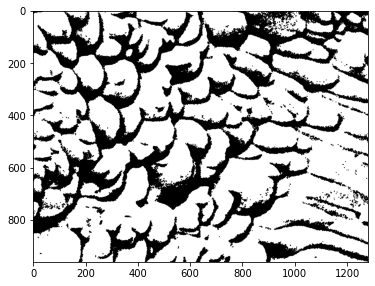

In [7]:
plt.figure(figsize=(6, 8))
plt.imshow(opening, cmap='gray')

In [8]:
sure_bg = cv2.dilate(opening, kernel, iterations=2)

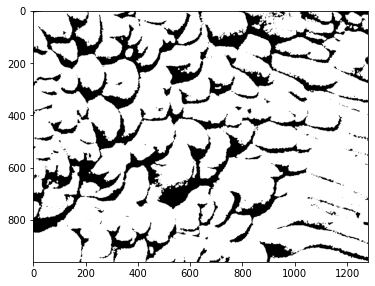

In [9]:
plt.figure(figsize=(6, 8))
plt.imshow(sure_bg, cmap='gray')

In [10]:
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 3)

<Figure size 432x576 with 0 Axes>

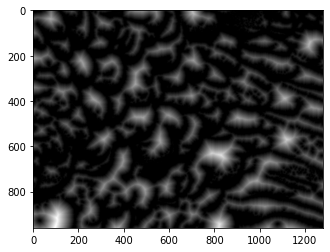

<Figure size 432x576 with 0 Axes>

In [11]:
plt.imshow(dist_transform, cmap='gray')
plt.figure(figsize=(6, 8))

In [12]:
ret2, sure_fg = cv2.threshold(dist_transform, 0.32*dist_transform.max(), 255, 0)
sure_fg = sure_fg.astype(np.uint8)

<Figure size 432x576 with 0 Axes>

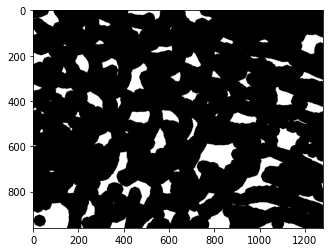

<Figure size 432x576 with 0 Axes>

In [13]:
plt.imshow(sure_fg, cmap='gray')
plt.figure(figsize=(6, 8))

In [14]:
unknown = cv2.subtract(sure_bg, sure_fg)

<Figure size 432x576 with 0 Axes>

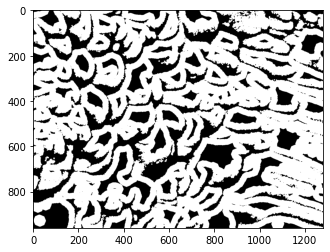

<Figure size 432x576 with 0 Axes>

In [15]:
plt.imshow(unknown, cmap='gray')
plt.figure(figsize=(6, 8))

In [16]:
ret3, markers = cv2.connectedComponents(sure_fg)
markers = markers+10
markers = np.uint8(markers)
markers[unknown==1] = 0

In [17]:
np.unique(markers)

array([  0,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,
        22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,
        35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,
        48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,
        61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,
        74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,
        87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99,
       100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114], dtype=uint8)

<Figure size 432x576 with 0 Axes>

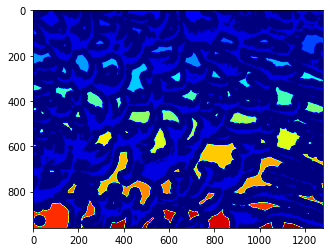

<Figure size 432x576 with 0 Axes>

In [18]:
plt.imshow(markers, cmap='jet')
plt.figure(figsize=(6, 8))

In [19]:
img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
markers = cv2.watershed(img, np.int32(markers))
img2 = color.label2rgb(markers, bg_label=10)

<Figure size 432x576 with 0 Axes>

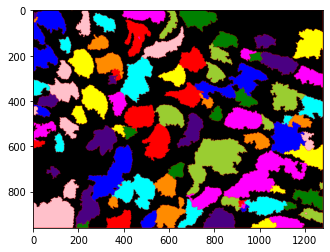

<Figure size 432x576 with 0 Axes>

In [20]:
plt.imshow(img2)
plt.figure(figsize=(6, 8))

In [21]:
skeleton_img = np.zeros(img.shape, dtype=np.uint8)
skeleton_img[markers == -1] = [255, 255, 255]

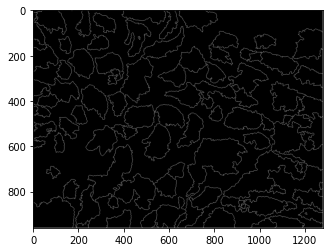

<Figure size 432x576 with 0 Axes>

In [22]:
plt.imshow(skeleton_img)
plt.figure(figsize=(6, 8))
plt.show()

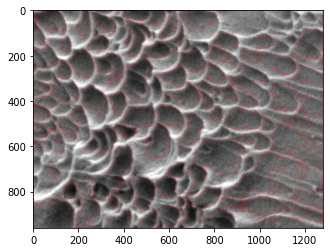

<Figure size 432x576 with 0 Axes>

In [23]:
img[markers == -1] = [255, 0, 0]
plt.imshow(img)
plt.figure(figsize=(6, 8))
plt.show()

In [ ]:
regions = measure.regionprops(markers, intensity_image=img)

In [ ]:
propslist = ['Area', 'equivalent_diameter', 
             'Orientation', 'MajorAxisLength',
             'MinorAxisLength', 'Perimeter',
             'MinIntensity', 'MaxIntensity',
             'MeanIntensity']

dimple_number=0
for region in regions:
  for i, prop in enumerate(propslist):
    